# Proyecto Final
### MIND: Minería de Datos
### Wilmer Arley Rodríguez Ropero

### 0. Descripción y carga del Dataset

Antes de empezar a elaborar el cuadernillo vamos a importar las siguientes librerias para poder cargar el Dataset:

Antes de cualquier cosa se recomienda instalar esta libreria para que corra el proyecto:

In [1]:
#pip install ipywidgets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_bank_org = pd.read_csv("bank-full.csv", sep = ";")
df_bank_org.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Despues de haber cargado el Dataset, vamos a realizar una breve descripción de los atributos que estamos trabajando, con el objetivo de poder entender mejor los datos para posteriores análisis.

|Atributo|Descripcion|Tipo|Dominio|
|-|-|-|-|
|age|Edad de la persona|Numérica||
|job|Tipo de trabajo|Categórica|"admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services"|
|marital|Estado marital|Categórica|"married", "divorced", "single"|
|education|Educación de la persona|Categórica|"unknown", "secondary", "primary", "tertiary"|
|default|Si la persona tiene credito en mora|Categórica|"yes", "no"|
|balance|Saldo promedio anual, en euros|Numérica||
|housing|Si la persona posee prestamo de vivienda|Categórica|"yes", "no"|
|loan|Si la persona posee prestamo personal|Categórica|"yes", "no"|
|contact|Modo de comunicación con la persona|Categórica|"unknown", "telephone", "cellular"|
|day|Último dia en que fue contactada la persona|Numérica||
|month|Último mes en que fue contactada la persona|Categórica|"jan", "feb", "mar", ..., "nov", "dec"|
|duration|Tiempo que tomo la última comunicación con la persona, en segundos|Númerica||
|campaign|Cantidad de comunicaciones realizadas a la persona durante una campaña, incluye la ultima vez que fue contactado|Númerica||
|pdays|Número de dias que pasaron despues de que el cliente haya sido contactado para campañas realizadas anteriormente|Numérica|-1 significa que el cliente anteriormente no fue contactado|
|previous|Cantidad de llamadas realizadas antes de la campaña actual|Numérica||
|poutcome|Resultado de campañas realizadas anteriormente|Categórica|"unknown", "other", "failure", "success"|
|y|Esta o no suscrito al credito|Categórica|"yes", "no"|

Los datos estan relacionados directamente con campañas del banco institucional Portugués. Estas campañas se realizaron con llamadas de teléfono a los clientes. Con frecuencia era necesario hacer mas de una llamada a un mismo cliente, para poder determinar si el cliente aceptaba o no estar suscrito a un deposito.

### 1. Datos Faltantes

En la descripción del dataset se menciona que este no posee datos nulos, sin embargo vamos verificar si esta en lo correcto.

In [4]:
df_bank_org.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Como no se tiene datos faltantes, podemos proseguir con la inserción de los datos nulos a nuestro dataset.

In [5]:
#Inserción de datos nulos
df_bank = df_bank_org.copy()
aux = 1
while aux != int(df_bank.shape[0] * 0.1):
    column = random.randint(0, 15)
    record = random.randint(0, 45210)
    if not pd.isna(df_bank.iloc[record, column]):
        df_bank.iloc[record, column] = np.nan
        aux += 1

In [6]:
#Corroborar que se ha insertado la cantidad correcta de datos nulos
print('Porcentaje de valores faltante:', round(df_bank.isnull().sum().map(lambda x: x/45211 * 100).sum()), '%', 
      '\nTotal valores faltantes:', df_bank.isnull().sum().sum(),
     '\nValores Faltantes en la clase:', df_bank.isnull().sum()["y"])

Porcentaje de valores faltante: 10 % 
Total valores faltantes: 4520 
Valores Faltantes en la clase: 0


Como podemos ver la inserción de datos nulos corresponde al 10% del total de registros, que vendria a ser 4520 registros aproximadamente, ademas se puede observar que en la clase del dataset no se ha insertado nigún dato nulo.

### 2. Exploratory Data Analysis

Para hacer el data Analysis vamos a graficar las cosas que más nos interesa en este orden:

- Distribución de los datos.
- Participación de los datos categóricos.
- Que meses y días fueron los que se concretaron un crédito.
- Cual es el mes con más llamadas y entre estas llamadas cuales concretaron o no un crédito.
- Por último, veremos cuales fueron los días en donde más se contactaron personas.

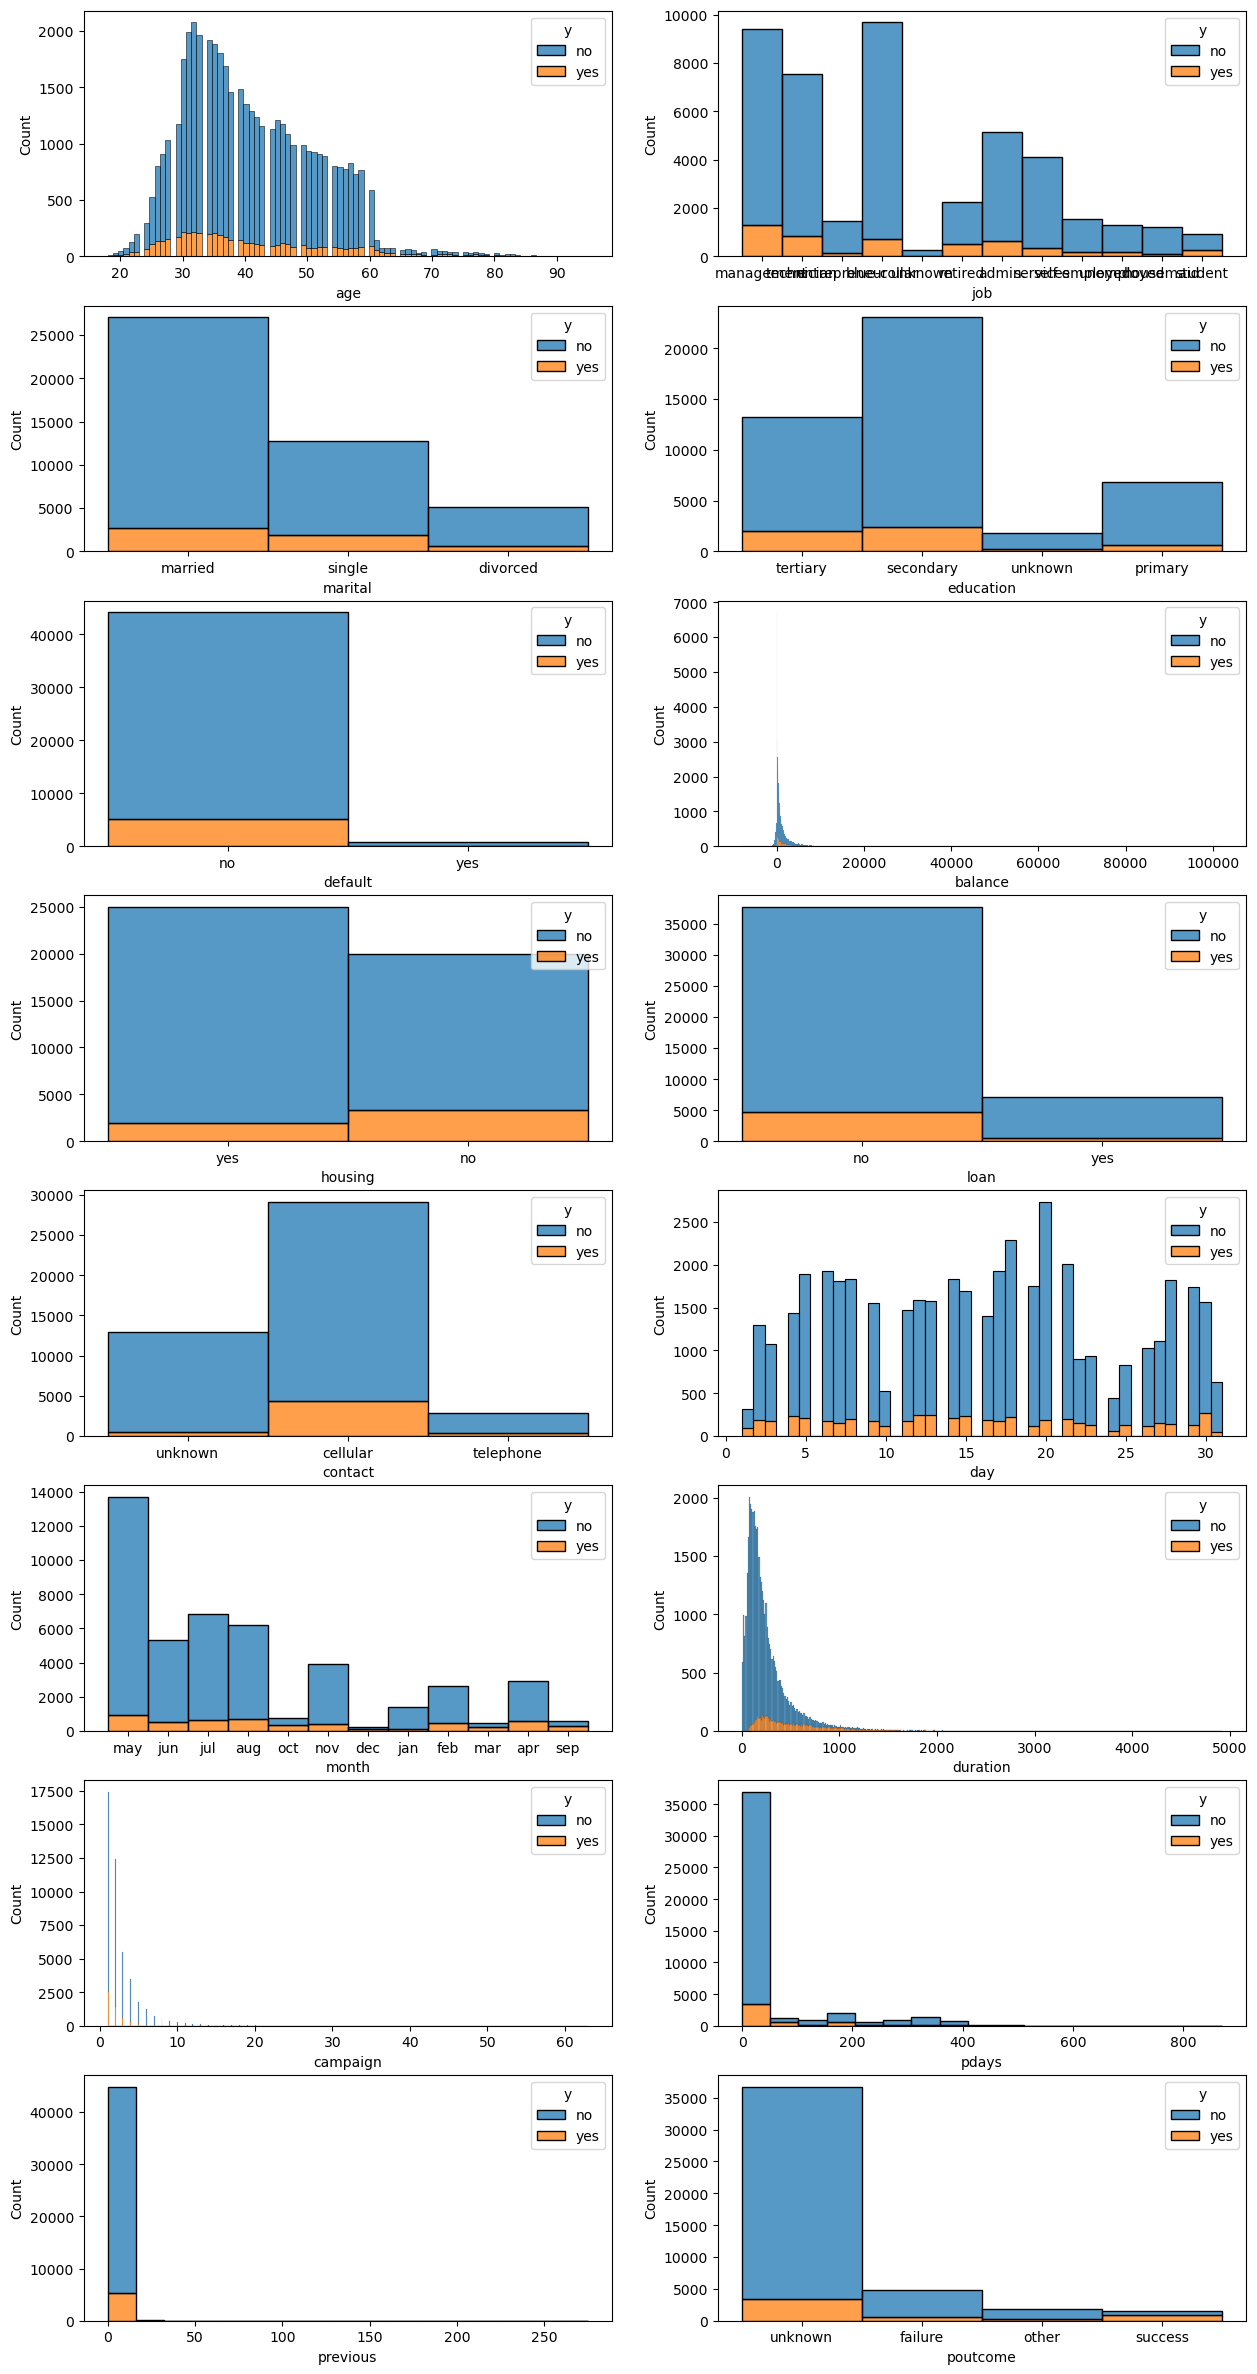

In [7]:
plt.figure(figsize = (15, 30))
for column in range(len(df_bank.columns) - 1):
    plt.subplot(8, 2, column + 1)
    sns.histplot(data = df_bank, x = df_bank.columns[column], hue = "y", multiple = "stack")
plt.show()

Como podemos observar de las distribuciones, es que hay atributos que poseen datos muy desbalanceados por ejemplo el caso de previous, pdays, duration, campaign tienen que ser evaluados con más detalle puesto que esa irregularidad puede afectar los modelos que trabajaremos más adelante.

Algo que ya se puede observar en estos histogramas es que el dataset está desbalanceado, la mayoría de los datos corresponden a la clase no, lo que es un problema a la hora de predecir ya que nuestro modelo lo más probable es que este sesgado.

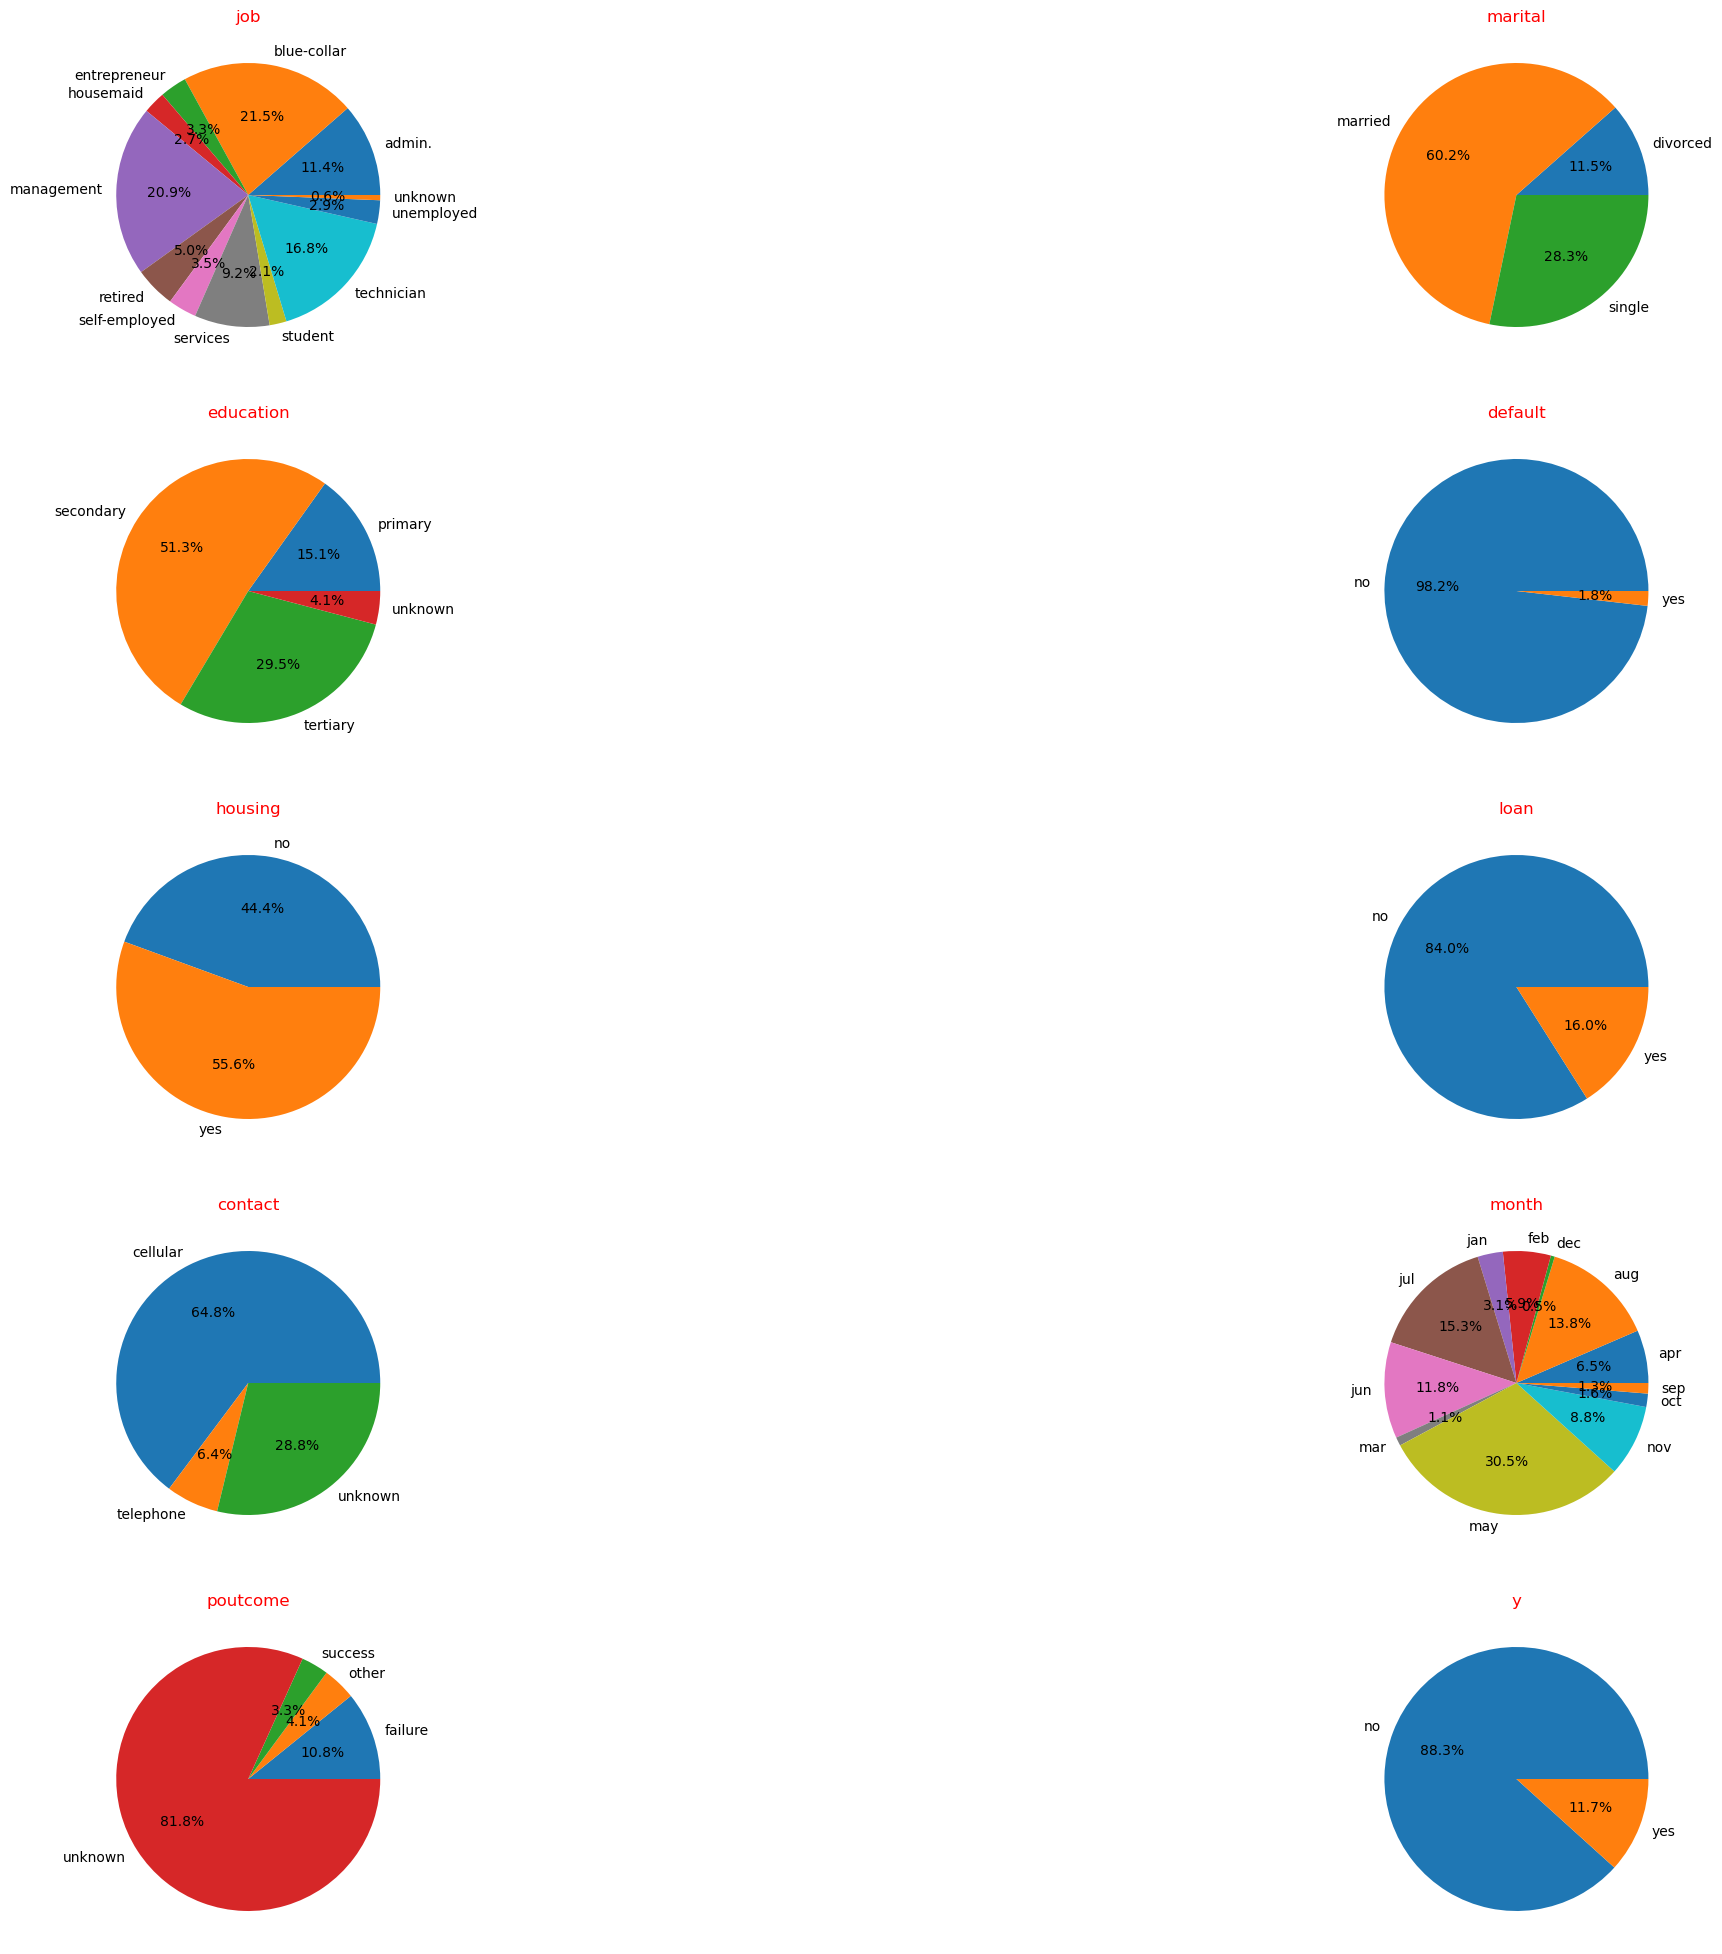

In [8]:
#Dataframe con solo las variables categóricas
df_bank_cat = df_bank.drop(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], axis = 1)
plt.figure(figsize = (30, 30))
for column in range(len(df_bank_cat.columns)):
    plt.subplot(6, 2, column + 1)
    df_aux = df_bank_cat.groupby([df_bank_cat.columns[column]])
    plt.pie(df_aux[df_bank_cat.columns[column]].describe()['count'], 
                 labels = df_aux[df_bank_cat.columns[column]].describe().index,
            autopct='%1.1f%%')
    plt.title(df_bank_cat.columns[column], color = "red")
plt.show()

Los piecharts se graficaron para cada atributo categórico, en esencia es para poder ver la participación de los datos en cada uno. Lo más interesante que podemos sacar de estos gráficos es lo siguiente:

1. En el estado marital, se puede ver que más de la mitad de las personas que fueron llamadas durante la campaña eran casadas lo que no puede decir más o menos a que grupo de personas estaban apuntando.
2. En el atributo poutcome, se observa que en preferencia escogieron personas que no habían participado en campañas anteriores del banco.
3. En default, se ven que casi la totalidad de las personas no poseen una mora en algún crédito.
4. El que mayor preocupación es y, donde casi el 90% de los datos son de personas que no fueron aceptadas para el crédito.

Esto sería unos de los puntos más interesantes que se pueden ver de estos gráficos.

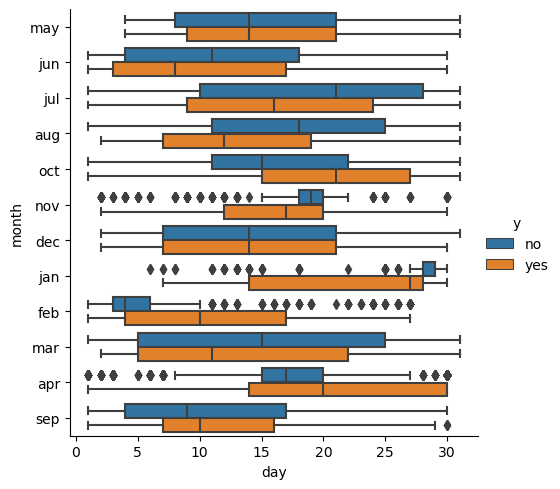

In [9]:
sns.catplot(data = df_bank, x = "day", y = "month", kind = "box" , hue = "y");
plt.show()

Este boxplot nos muestra la distribución de los días de la última llamada, respecto al mes y a la clase. De estos gráficos lo que podemos ver más que todo es los días donde se trabaja y aquellos donde era raro atender llamadas. Por ejemplo, en noviembre se puede ver que era normal tener llamadas que concretaran el crédito, mientras que las llamadas que no llegaron a un acuerdo estuvieron entre los dias 15 y 22 y de vez en cuando una que otra a parte de estas a lo largo del mes.

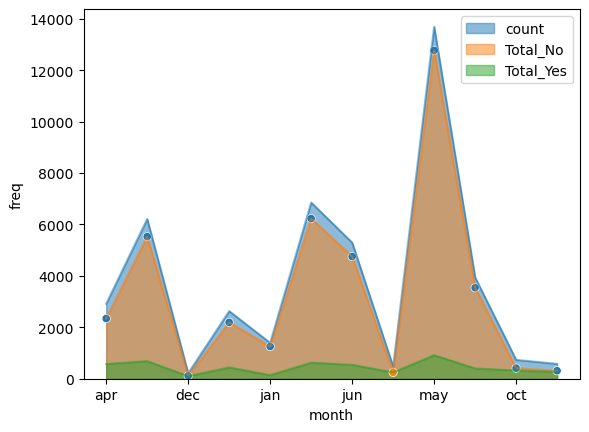

In [10]:
df_bank_aux = df_bank[["month", "y"]].groupby("month").describe()["y"]
df_bank_aux["Total_No"] = df_bank_aux.apply(lambda row: row.freq if row.top == "no" else row["count"] - row.freq, axis = 1)
df_bank_aux["Total_Yes"] = df_bank_aux.apply(lambda row: row.freq if row.top == "yes" else row["count"] - row.freq, axis = 1)
df_bank_aux[["count", "Total_No", "Total_Yes"]].plot.area(stacked = False)
sns.scatterplot(data=df_bank_aux, x=df_bank_aux.index, y="freq", hue="top", legend = False);

Este gráfico representa los meses donde se realizaron las ultimas llamadas a cada persona. Se puede ver que en el mes que hubo más llamadas fue en mayo, mientras que el mes en que menos llamadas se realizaron fueron en diciembre.

Algo interesante es que solo hubo un mes donde las llamadas que terminaron en un crédito aprobado fueron superiores a las que no llegaron a nada, y es curioso ya que la tendencia de aprobar los créditos a lo largo de los meses se mantiene, mientras que las llamadas que no llegaron a nada tienen picos y no es constante.

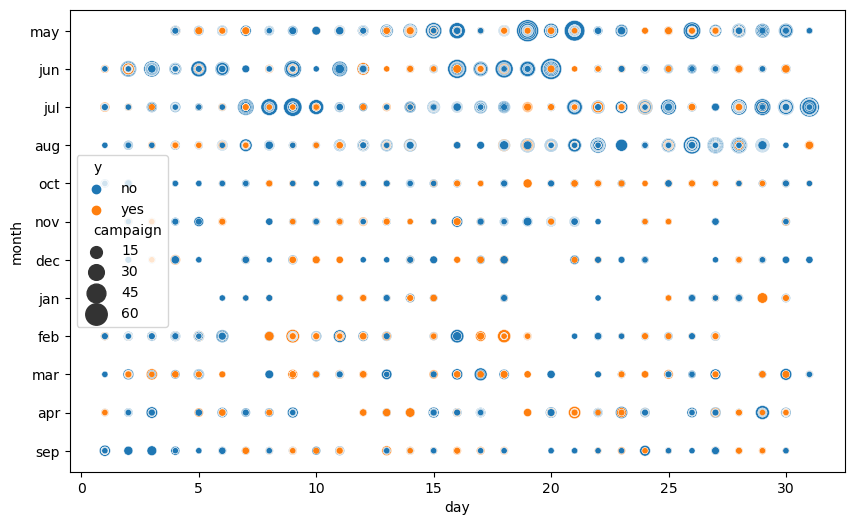

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_bank, y="month", x="day", hue = "y", size = "campaign", sizes=(20, 250));

En este gráfico lo que podemos ver es el mes y día donde más llamadas se hicieron, por ejemplo, de los días 15 hasta el 20 de junio hubo una gran cantidad de llamadas realizadas. Otro fenómeno interesante es que en enero casi no hay llamadas puesto que se ven días vacíos y el tamaño de los puntos es muy pequeño al igual que en diciembre.

Otra cosa que se puede ver es que en mayo, junio y julio la cantidad de llamadas realizadas junto con los créditos que no fueron aprobados es alta. Esto lo que nos podría decir es que entre más llamadas se le realizan a una persona pues más probabilidad hay de que no se le acepte un crédito.

### 3. Preprocesamiento

Antes que todo, imputaremos los datos nulos para poder ver que otras técnicas de preprocesamiento podemos aplicar a los datos.

#### Imputación de datos

En este caso, escogeremos tres métodos de imputación y por medio del error cuadrado escogeremos el dataset a trabajar. Los métodos que trabajaremos seran:

- Media
- Mediana
- KNN(K = 20)

Para hacer la imputación necesitamos que los datos que manejamos sean todos numéricos puesto que la librería de sklearn que vamos a usar los necesita.

In [12]:
#Crear instancia del encoder
encoder = OrdinalEncoder()
#Entrenamos el encoder con solo los atributos categoricos del dataset
df_encoder = df_bank.drop(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], axis = 1)
df_bank[df_encoder.columns] = encoder.fit_transform(df_encoder)
df_bank.dtypes

age          float64
job          float64
marital      float64
education    float64
default      float64
balance      float64
housing      float64
loan         float64
contact      float64
day          float64
month        float64
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome     float64
y            float64
dtype: object

Como se puede observar todos los atributos ahora son numéricos, solo para evitar problemas mas adelante vamos a verificar que no haya codificado los datos nulos.

In [13]:
df_bank.isnull().sum().sum()
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,2.0,5.0,8.0,261.0,1.0,-1.0,0.0,3.0,0.0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,2.0,5.0,8.0,151.0,1.0,-1.0,0.0,3.0,0.0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,5.0,8.0,76.0,1.0,-1.0,0.0,3.0,0.0
3,47.0,1.0,1.0,3.0,0.0,1506.0,1.0,NaN,2.0,5.0,8.0,92.0,1.0,-1.0,0.0,3.0,0.0
4,33.0,11.0,2.0,3.0,0.0,1.0,0.0,0.0,2.0,5.0,8.0,198.0,1.0,-1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9.0,1.0,2.0,0.0,825.0,0.0,0.0,0.0,17.0,9.0,977.0,3.0,-1.0,0.0,3.0,1.0
45207,71.0,5.0,0.0,0.0,0.0,1729.0,0.0,0.0,0.0,17.0,9.0,456.0,2.0,-1.0,0.0,3.0,1.0
45208,72.0,5.0,1.0,1.0,0.0,5715.0,0.0,0.0,0.0,17.0,9.0,1127.0,5.0,184.0,3.0,2.0,1.0
45209,57.0,1.0,1.0,1.0,0.0,668.0,0.0,0.0,1.0,17.0,9.0,508.0,4.0,-1.0,0.0,3.0,0.0


Ya con esto corroborado ahora si continuaremos con la imputación de los datos por los métodos ya mencionados.

#### - Imputación por media

Con ayuda de la librería Sklearn imputaremos los datos primero por la media.

In [14]:
#Creamos la instancia de la imputación y escogemos el metodo
imputer_mean = SimpleImputer(missing_values = np.nan, strategy='mean')
#Entrenamos la imputación y asignamos a un dataframe
df_imp_mean = df_bank.copy()
df_imp_mean[df_bank.columns] = imputer_mean.fit_transform(df_bank)

Corroboramos que se haya imputado de manera correcta.

In [15]:
df_imp_mean.isnull().sum().sum()

0

Y como se puede observar no se encontro ningún valor nulo en el dataframe, ahora procederemos al siguiente método.

#### - Imputación por mediana

In [16]:
#Creamos la instancia de la imputación y escogemos el metodo
imputer_median = SimpleImputer(missing_values = np.nan, strategy='median')
#Entrenamos la imputación y asignamos a un dataframe
df_imp_median = df_bank.copy()
df_imp_median[df_bank.columns] = imputer_median.fit_transform(df_bank)

Corroboramos que la imputación se haya efectuado de manera correcta.

In [17]:
df_imp_median.isnull().sum().sum()

0

Ahora procederemos al último método para poder continuar con el preprocesamiento de los datos.

#### - Imputación por KNN

In [18]:
#Creamos la instancia de la imputación y escogemos la cantidad de vecinos
imputer_KNN10 = KNNImputer(missing_values = np.nan, n_neighbors=20)
#Entrenamos la imputación y asignamos a un dataframe
df_imp_knn = df_bank.copy()
df_imp_knn[df_bank.columns] = imputer_KNN10.fit_transform(df_bank)

Corroboramos que se haya efectuado de maner correcta la imputación.

In [19]:
df_imp_knn.isnull().sum().sum()

0

Ahora con los tres datasets, vamos a compararlos con su error cuadrado y a partir de este determinaremos cual es el mejor para continuar.

#### Escoger Método

Usaremos la siguiente función para poder realizar la comparación entre los datasets.

In [20]:
#Esta función calcula el promedio del error cuadraro por variable
#param dfImp es un DataFrame que haya sido imputado por algun metodo
#return result es un Series que contiene los valores del MSE por cada variable ademas de tener una columna total que suma y 
#promedia estos errores
df_bank_org_encoder = df_bank_org.copy()
df_bank_org_encoder[df_encoder.columns] = encoder.transform(df_bank_org[df_encoder.columns])
def mean_square_error(dfImp):
    df_aux = (df_bank_org_encoder - dfImp)**2
    result = pd.Series(dtype = 'float')
    for column in df_aux:
        result[column] = df_aux[column].sum()/df_aux.shape[0]
    result['Promedio'] = result.sum()/result.size
    result['Total'] = result.sum()
    return result

In [21]:
data = {"Media" : mean_square_error(df_imp_mean), "Mediana" : mean_square_error(df_imp_median),
       "KNN 20" : mean_square_error(df_imp_knn)}
pd.concat(data, axis = 1)

,Media,Mediana,KNN 20
age,0.782568,0.827210,0.817520
job,0.070106,0.071133,0.075341
marital,0.002099,0.002300,0.001887
education,0.004062,0.004247,0.004249
default,0.000087,0.000088,0.000084
balance,43185.187825,49350.974254,44439.786227
housing,0.001457,0.002610,0.001375
loan,0.000869,0.001040,0.000889
contact,0.005362,0.008095,0.004916
day,0.428808,0.428480,0.420793


En este caso se puede observar que los tres casos de imputación de los datos, dan errores muy similares lo que nos da confianza de que sin importar el método que tomemos nos dará buenos resultados.

En este caso escogeremos el método de la media ya que en casi todos los atributos es el que posee el menor error, además de que también dio el promedio junto con la suma total más pequeñas a comparación de los otros metodos.

#### Normalización y Discretización de los datos

A partir de los histogramas que se realizaron para ver un poco mas la distribución de los datos, se pudo ver que los siguientes atributos tienen que se analizados con más detalle para ver si es necesario tratarlos o no. Los atributos son los siguientes:
- age
- balance
- duration
- campaign
- previous
- pdays
- day

Vamos a gráficar unos boxplot de los anteriores atributos para tener más idea del trabajo que seria mas adecuado realizar.

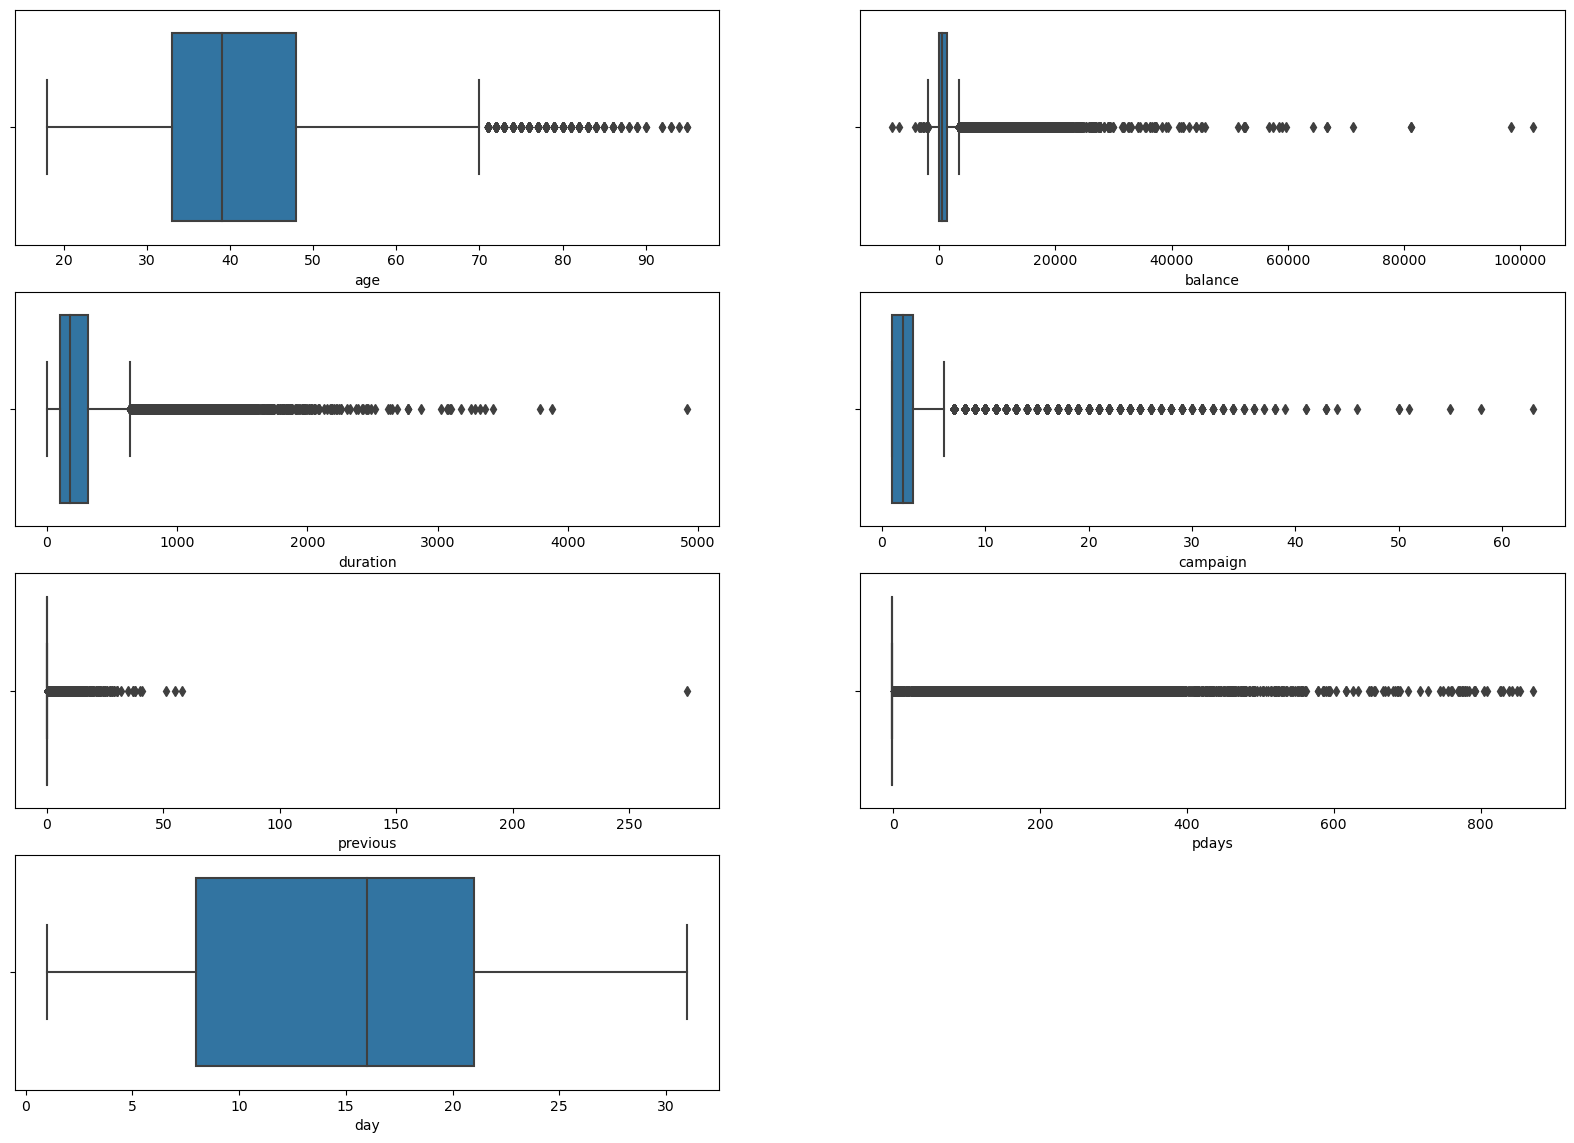

In [22]:
df_bank_aux = df_bank[["age", "balance", "duration", "campaign", "previous", "pdays", "day"]]
plt.figure(figsize=(20, 25))
for column in range(len(df_bank_aux.columns)):
    plt.subplot(7, 2, column + 1)
    sns.boxplot(x = df_imp_mean[df_bank_aux.columns[column]])
plt.show()

A partir de los boxplots se puede observar varias cosas, lo primero es que se encuentran varios outliers en la mayoria de los atributos, ademas de que atributos como **duration** y **balance** presentan valores muy grandes. Con lo anterior en mente, se va a realizar lo siguiente:
- Los atributos **duration** y **balance** se van a normalizar para disminuir el rango de valores para que sean mas pequeños lo que hace que sean mas manejables para algunos modelos.
- Los atributos **pdays**, **campaign** y **previous** se van a discretizar, ya que en los histogramas se puede ver que estos atributos no poseen una distribución muy amplia y los valores no se encuentran en un gran rango a comparación de los anteriores.
- Por ultimo los atributos **day** y **age** no se les hara ningun proceso ya que en los histogramas no se ve que posean una distribución muy amplia pero tampoco queremos perder su comportamiento ya que en los boxplot se puede ver que son los que poseen mejor distribución.

#### - Normalizar

Con ayuda de la librería Sklearn vamos a normalizar los datos con MinMaxScaler, y aunque se pudo observar en los boxplots que los atributos poseen ouliers, en algunos modelos como son los de NaiveBayes no acepta valores negativos para algunas de sus implementaciones, por lo que si utilizáramos el StandarScaler no podemos manejar el rango que queremos para la normalización y este podría poner valores negativos que no queremos.

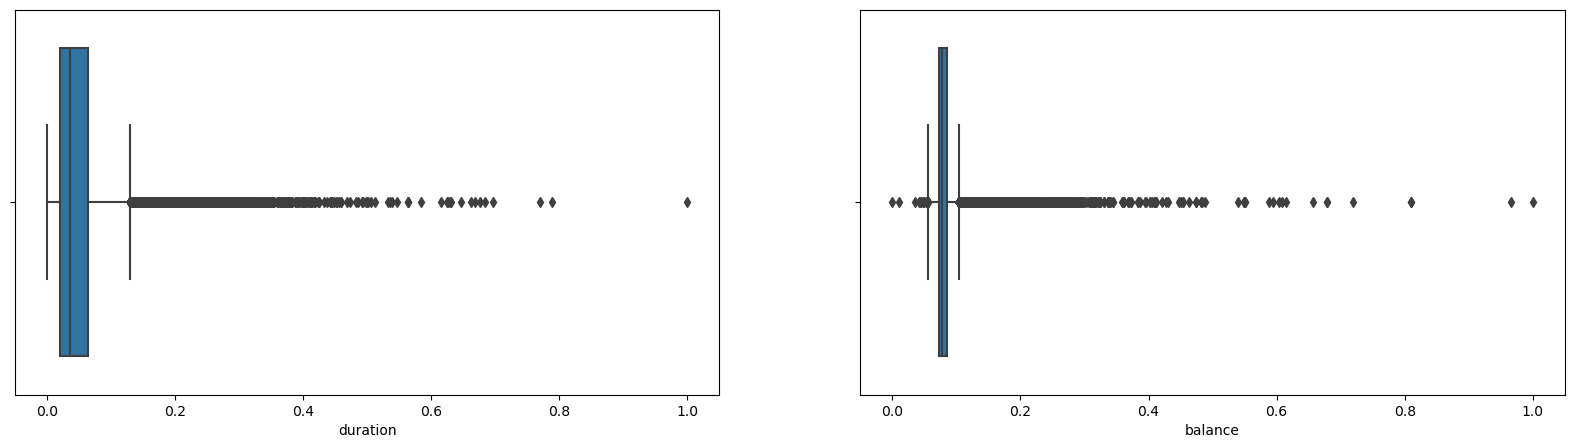

In [23]:
#Crear instancia de StandardScaler
scaler = MinMaxScaler()
#Entrenar modelo y cambiar columnas del dataset
df_imp_mean[["duration", "balance"]] = scaler.fit_transform(df_imp_mean[["duration", "balance"]])
#Graficamos de nuevo los boxplots para corroborar
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x = df_imp_mean["duration"])
plt.subplot(1, 2, 2)
sns.boxplot(x = df_imp_mean["balance"])
plt.show()

#### - Discretización

Ahora procederemos a discretizar los atributos que se analizaron anteriormente.

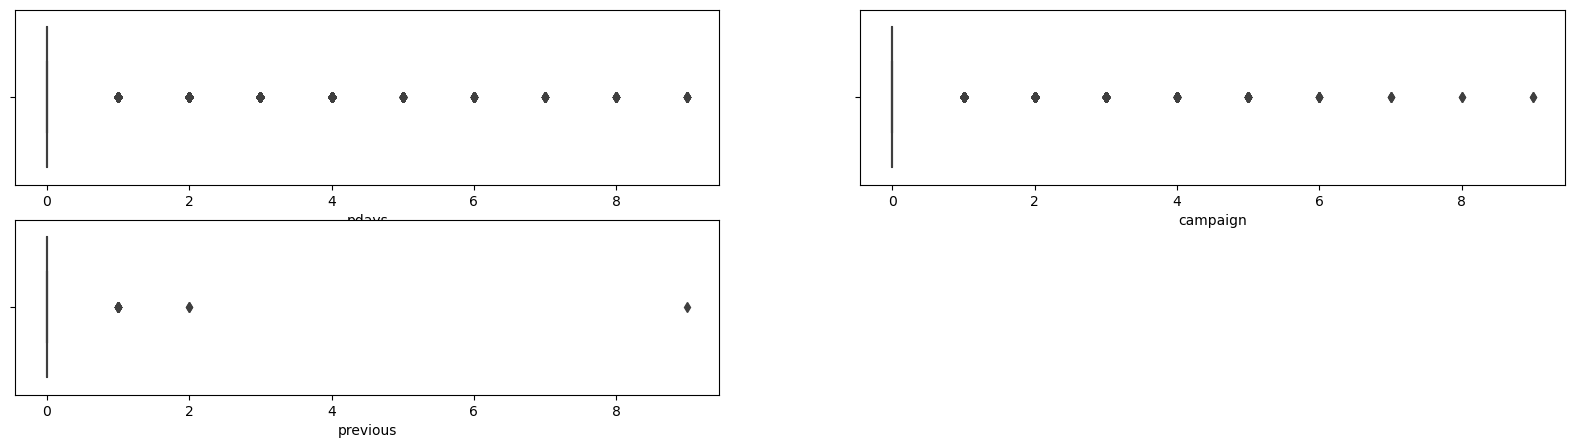

In [24]:
#Creamos la instancia, vamos a discretizar con 10 rangos
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#Entrenamos y aplicamos al dataset
df_imp_mean[["pdays", "campaign", "previous"]] = disc.fit_transform(df_imp_mean[["pdays", "campaign", "previous"]])
#Graficamos
plt.figure(figsize=(20, 5))
plt.subplot(2, 2, 1)
sns.boxplot(x = df_imp_mean["pdays"])
plt.subplot(2, 2, 2)
sns.boxplot(x = df_imp_mean["campaign"])
plt.subplot(2, 2, 3)
sns.boxplot(x = df_imp_mean["previous"])
plt.show()

Aunque a primera vista pareciera que la distribución de los datos se ha perdido, lo que en realidad se ha realizado es disminuir los valores outliers, esto se hace con el fin de el modelo aumente su precisión aunque en realidad no nos garantiza que se haya perdido información importante para el entrenamiento de estos.

### 4. Clasificación Supervisada

Los métodos que vamos a usar para la clasificación supervisada van a ser los siguientes:
- Naive Bayes
- Random Forests
- Support Vector Machine

Antes de empezar con los modelos vamos a hacer un split a los datos para tener la misma parte de train y test para todos los modelos y asi poder compararlos todos despues.

#### Split Dataset

In [25]:
#Dividir el dataset entre los atributos predictores y la clase
X = df_imp_mean.drop(["y"], axis = 1)
y = df_imp_mean["y"]
#Dividir entre el test y el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
print(len(X_train))

31647


Con esto ya realizado, procederemos a montar los modelos supervisados.

#### Naive Bayes

Para entender un poco mas este modelo, existen en la libreria de sklearn 4 variantes los cuales son:

- GaussianNB: Este tipo de modelo se utiliza más que todo en casos donde tengamos variables continuas, ya que espera que el comportamiento de estas sea similar a la distribución gaussiana y a partir de esta calcular las probabilidades.
- MultinomialNB: Este modelo, al igual que en el gaussiano, usa una distribución que es conocida como multinomial este tipo de distribución es muy conveniente en atributos que sean discretos ya que se acopla mejor.
- BernoulliNB: Este modelo con ayuda de la distribución bernoulli, lo que hace es asumir los datos como binarios que estan comprendidos entre 0 y 1.
- CategoricalNB: Este modelo es similar al Gaussian, la diferencia es que esta enfocado para manejar atributos categoricos.

Despues de haber mencionado las distintas variantes de NaiveBayes, vamos a implementar las 4 y veremos cual nos da mejores resultados.

#### - GaussianNB

In [27]:
#Importamos la libreria que vamos a utilizar
from sklearn.naive_bayes import GaussianNB
#Creamos instancia del modelo
gaussian = GaussianNB()
#Entrenamos el modelo
gaussian = gaussian.fit(X_train, y_train)

In [28]:
#Ponemos a predecir al modelo
y_pred = gaussian.predict(X_test)
#Vemos la precisión del modelo
print(f"La exactitud del modelo es de aproximadamente el : {metrics.accuracy_score(y_test, y_pred)*100} %")

La exactitud del modelo es de aproximadamente el : 84.93807136537895 %


#### - MultinomialNB

In [29]:
#Importamos la libreria que vamos a utilizar
from sklearn.naive_bayes import MultinomialNB
#Creamos instancia del modelo
multinomial = MultinomialNB()
#Entrenamos el modelo
multinomial = multinomial.fit(X_train, y_train)

In [30]:
#Ponemos a predecir al modelo
y_pred = multinomial.predict(X_test)
#Vemos la precisión del modelo
print(f"La exactitud del modelo es de aproximadamente el : {metrics.accuracy_score(y_test, y_pred)*100} %")

La exactitud del modelo es de aproximadamente el : 85.13712769094663 %


#### - BernoulliNB

In [31]:
#Importamos la libreria que vamos a utilizar
from sklearn.naive_bayes import BernoulliNB
#Creamos instancia del modelo
bernoulli = BernoulliNB()
#Entrenamos el modelo
bernoulli = bernoulli.fit(X_train, y_train)

In [32]:
#Ponemos a predecir al modelo
y_pred = bernoulli.predict(X_test)
#Vemos la precisión del modelo
print(f"La exactitud del modelo es de aproximadamente el : {metrics.accuracy_score(y_test, y_pred)*100} %")

La exactitud del modelo es de aproximadamente el : 88.49159539958714 %


#### - CategoricalNB

In [33]:
#Importamos la libreria que vamos a utilizar
from sklearn.naive_bayes import CategoricalNB
#Creamos instancia del modelo
categorical = CategoricalNB()
#Entrenamos el modelo
categorical = categorical.fit(X_train ,y_train)

In [34]:
#Ponemos a predecir al modelo
y_pred = categorical.predict(X_test[:10257])
#Vemos la precisión del modelo
print(f"La exactitud del módelo es de aproximadamente el : {metrics.accuracy_score(y_test[:10257], y_pred)*100} %")

La exactitud del módelo es de aproximadamente el : 87.70595690747783 %


En general el modelo Naive Bayes es conocido por su consistencia a la hora de dar altos valores de presición, esto lo podemos observar en los modelos que hemos creado anteriormente ya que ninguno tiene una presición menor al 80% a la hora de predecir.

#### Random Forest

Ahora construiremos el modelo de Random Forest, partiremos construyendo uno sencillo y despues con ayuda de un GridSearch intentaremos optimizar lo mejor que podamos al modelo.

In [35]:
#Crear instancia del Random Forest
rfc = RandomForestClassifier(random_state = 1)
#Entrenar el arbol de decision
rfc = rfc.fit(X_train, y_train)
#Pasamos el test para obtener la clase de predicción
y_pred = rfc.predict(X_test)

In [36]:
print(f"La exactitud del modelo es de aproximadamente el : {metrics.accuracy_score(y_test, y_pred)*100} %")

La exactitud del modelo es de aproximadamente el : 90.62223532881156 %


Como podemos ver el modelo sin haber realizado una busqueda intensiva de los parametros nos ha dado cerca a un 90% de presición, lo que nos da confianza de que si intentamos optimizarlo podriamos tener mejores resultados.

Cabe aclarar que si trataramos de optimizar el modelo podriamos sufrir de overfitting, sin embargo el Random Forest presenta la cualidad de no ajustarse demasiado a los datos ya que de fondo son varios modelos de arboles de decisión con diferentes dataset que los entrena.

##### - Busqueda de parametros

Los parametros que optimizaremos seran los siguientes:
- n_estimators : Es el número de arboles que contendra el bosque
- criterion : Al igual que en el árbol de decisión se encarga de calcular la uniformidad de los nodos implementando ciertos metodos.
- max_depth : Al igual que en los arboles de decisión, es la profundidad maxima que puede alcanzar cada árbol.
- min_samples_split : Es el número mínimo de muestra que se necesitan antes de dividir el nodo
- min_samples_leaf : Es el número mínimo de muestras para que un nodo pueda ser considerado una hoja del árbol

Como hacer validación cruzada es muy costosa computacionalmente, vamos a tomar una estrategía que esta documentada en el siguiente [enlace](https://www.cienciadedatos.net/documentos/py08_random_forest_python.html), y es que a partir de out-of-bag-scores que corresponde a un promedio de un error que se calcula de los elementos que el bootstrap en cierto sentido ignora, y a cada arbol que crea pasa estos elementos para generar un error individual, lo que al final nos da una precisión total del modelo. Esto es bastante util ya que computacionalmente es más liviano y da resultados buenos resultados.

In [37]:
#Tomado de https://www.cienciadedatos.net/documentos/py08_random_forest_python.html
param_grid = ParameterGrid({'criterion' : ['gini', 'entropy'],
                            'n_estimators' : [x for x in range(100, 201, 100)],
                            'min_samples_leaf' : [x for x in range(1, 3)],
                            'min_samples_split' : [x for x in range(2, 5)],
                            'max_depth' : [None, 4],
                            'max_features': [5, 7, 9]
                           })
resultados = {'params': [], 'oob_r2': []}
#Un ciclo que se itera sobre el param_grid para extraer los parametros que construiran cada Forest
for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    modelo.fit(X_train, y_train)
    #Guardamos los parametros junto con el error oob que obtuvimos
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    #Imprimimos los parametros que estamos validando
    print(f"Modelo: {params} \u2713")


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max

Modelo: {'criterion': 'gini', 'max_depth': 4, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': 4, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': 4, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': 4, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': 4, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': 4, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': 4, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': 4, 'max_feat

Modelo: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200} ✓
Modelo: {'criterion': 'entropy', '

In [38]:
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(3)

,oob_r2,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
5,0.905141,gini,NaN,5,1,4,200
73,0.904951,entropy,NaN,5,1,2,200
75,0.904730,entropy,NaN,5,1,3,200


Como podemos ver el mejor resultado que obtuvimos al intentar optimizar no se diferencia ni en el 1%, lo que podriamos decir que el primer modelo que creamos ya es lo suficientemente estable por lo que mejor seguiremos trabajando con el incial para la comparación que haremos posteriormente.

Por ultimo vamos a apoyarnos en un widget para cambiar la cantidad de arboles que puede tener un bosque y ver que tanto cambia este parametro el comportamiento del bosque, como estos valores los probamos en el GridSearch esto es solo una forma de vizualizarlos.

In [39]:
#Nos apoyaremos del codigo del siguiente enlace https://www.cienciadedatos.net/documentos/py08_random_forest_python.html
def bosque(max_depth, max_feature, criterion, estimator_range):
    train_scores = []
    oob_scores   = []
    # Valores evaluados
    estimator_range = range(estimator_range[0], estimator_range[1], 10)
    # Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
    # de entrenamiento y de Out-of-Bag.
    for n_estimators in estimator_range:
        modelo = RandomForestClassifier(
                    n_estimators = n_estimators,
                    max_depth    = max_depth,
                    max_features = max_feature,
                    criterion = criterion,
                    oob_score    = True,
                    n_jobs       = -1,
                    random_state = 123
                 )
        modelo.fit(X_train, y_train)
        train_scores.append(modelo.score(X_train, y_train))
        oob_scores.append(modelo.oob_score_)
    # Gráfico con la evolución de los errores
    fig, ax = plt.subplots(figsize=(6, 3.84))
    ax.plot(estimator_range, train_scores, label="train scores")
    ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
    ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores), marker='o', color = "red", label="max score")
    ax.set_ylabel("R^2")
    ax.set_xlabel("n_estimators")
    ax.set_title("Evolución del out-of-bag-error vs número árboles")
    plt.legend();
    print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

In [40]:
interact(bosque, max_depth = [None, 2, 4, 6], max_feature = (0, 8, 2), criterion = ['gini', 'entropy'], estimator_range = widgets.SelectionRangeSlider(
    options=[1, 100, 200],
    index=(0, 2),
    disabled=False
));

interactive(children=(Dropdown(description='max_depth', options=(None, 2, 4, 6), value=None), IntSlider(value=…

#### Support Vector Machine

Al igual que elaboramos anteriormente construiremos un modelo sencillo y despues trataremos de optimizarlo.

In [41]:
from sklearn.svm import SVC
#Crear instancia del SVM
vector = SVC()
#Entrenamos el modelo
vector = vector.fit(X_train, y_train)
#Ponemos a predecir al modelo
y_pred = vector.predict(X_test)

In [42]:
print(f"La exactitud del modelo es de aproximadamente el : {metrics.accuracy_score(y_test, y_pred)*100} %")

La exactitud del modelo es de aproximadamente el : 88.56531996461221 %


#### Optimización de parametros

Como bien se sabe en las máquinas de soporte vectorial se tiene una base algebraica bastante compleja donde se tocan temas como los hiperplanos, vectores de soporte, optimización y, el que trabajaremos directamente, kernels.

Cuando se habla de SVM se sabe que podemos trabajar en distintas dimensiones para lograr categorizar o dividir lo datos por medio de los hiperplanos, más sin embargo no sabemos cuál es la dimensión más adecuada para realizar este trabajo, en este punto es que entran los kernels para ayudarnos en la forma de optimizar el modelo, no entraremos en mas detalle por el momento, pero es importante tener una idea de que son transformaciones en de cierta forma que ayudan al modelo.

Dentro del mismo modelo se encuentra otro parámetro que es importante mas que todo en el control del bias-varianza y capacidad predictiva del modelo, este parámetro se le conoce como **C** y lo que hace es determinar la severidad permitida respecto las violaciones sobre la margen que se establece del hiperplano.

Como ya sabemos cuales son los parametros que tienen un papel muy importante en la capacidad predictiva de este modelo, vamos a intentar optimizarlos para ver si podemos obtener mejores resultados.

In [43]:
param_grid = ParameterGrid({'kernel' : [["sigmoid"], ["rbf"]],
                            'C': [[x] for x in np.logspace(-5, 3, 5)]
                           })
param_grid = GridSearchCV(
    estimator = SVC(random_state = 123),
    param_grid = param_grid,
    n_jobs     = -1,
)
param_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=123), n_jobs=-1,
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x000001DA85CCE6A0>)

In [44]:
y_pred = param_grid.predict(X_test)
print(f"Los mejores parámetros que se encontraron fueron los siguientes : {param_grid.best_params_}"
    ,f"\nLa exactitud del modelo es de aproximadamente el : {metrics.accuracy_score(y_test, y_pred)*100} %")

Los mejores parámetros que se encontraron fueron los siguientes : {'C': 1000.0, 'kernel': 'rbf'} 
La exactitud del modelo es de aproximadamente el : 89.29519315836036 %


Como se puede ver, hemos obtenido mejores resultados optimizando estos parametros. Hay que tener un poco de cuidado con el parámetro **c** porque como se menciono anteriormente se encarga del control del bias-varianza si este parametro se mueve demasiado podemos generar overfitting.

### 5. Evaluación de los modelos

Para esta parte vamos a escoger los modelos de los tres métodos que nos dio mejor exactitud y vamos a crear matrices de confusión por cada uno para saber cuales fueron los fallos y aciertos que hizo cada modelo.

Exactitud del modelo Naive Bayes :0.8849159539958714 
Precisión del modelo Naive Bayes :0.4 
Exhaustividad del modelo Naive Bayes :0.012894906511927788


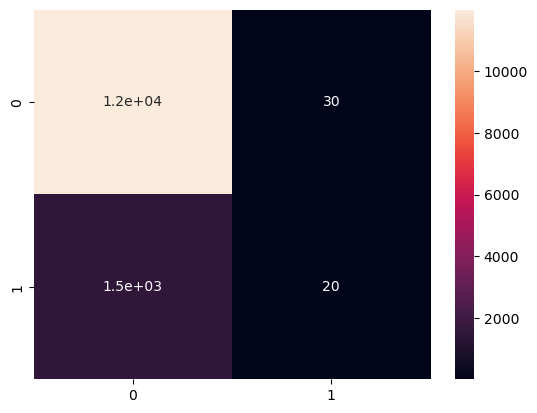

Exactitud del modelo Bosque :0.9062223532881156 
Precisión del modelo Bosque :0.6340057636887608 
Exhaustividad del modelo Bosque :0.425531914893617


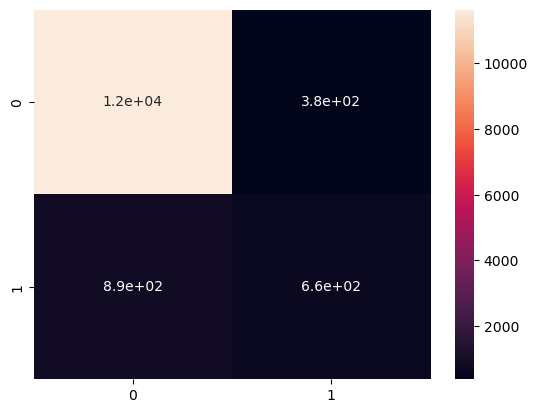

Exactitud del modelo Support Vector Machine :0.8929519315836036 
Precisión del modelo Support Vector Machine :0.6451612903225806 
Exhaustividad del modelo Support Vector Machine :0.14184397163120568


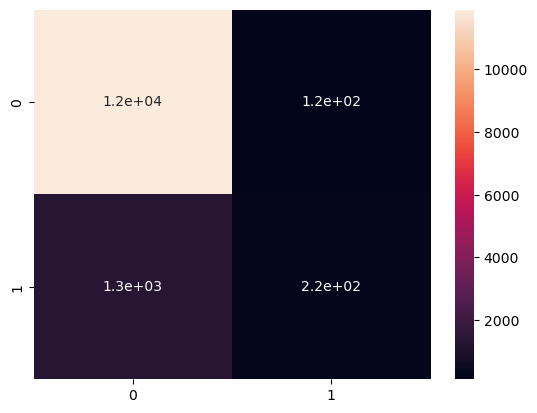

In [45]:
modelos = {'Naive Bayes': bernoulli, 'Bosque': rfc, 'Support Vector Machine': param_grid}
for model in modelos:
    y_pred = modelos[model].predict(X_test)
    print(f'Exactitud del modelo {model} :{metrics.accuracy_score(y_test, y_pred)}',
         f'\nPrecisión del modelo {model} :{metrics.precision_score(y_test, y_pred)}',
         f'\nExhaustividad del modelo {model} :{metrics.recall_score(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
    plt.show()

Graficamos una matriz de confusión por cada moledo que escogimos entre los que entrenamos y podemos observar varias cosas interesantes.

Lo primero que se puede observar es que el modelo de Naive Bayes presenta una exactitud del modelo bastante alta, sin embargo no podemos confiar solamente en este indicador, al observar la matriz de confusion se pudo observar que tenía un grave problema para identificar los casos verdaderos positivos, ya que la mayoría se fueron a los falsos positivos(Las personas que no aceptaron, pero el modelo las considero aptas), esto se puede ver mejor con el indicador de la exhaustividad, lo que nos dice este porcentaje es la capacidad del modelo para identificar los verdaderos positivos(Las personas que aceptaron), en otras palabras que entre 10 personas que son aptas para el crédito, el modelo no reconocería a ninguna de ellas correctamente lo que en resumidas cuentas hace que este modelo no sea apto.

Observando el siguiente modelo que es el bosque se puede ver que presenta una exactitud bastante alta y su exhaustividad es cerca al 42%, en otras palabras, el modelo es capaz de identificar 1 de cada 2 personas que si son aceptaron el crédito. Mirando otro indicador como la precisión, se puede ver que es cerca al 63%, esto quiere decir que del total de casos positivos (Cuando el modelo predijo que la persona acepto) tuvo una equivocación del 27%, lo que es mucho mejor que el porcentaje de equivocación de Naive Bayes que es del 57%.

Pasando al último modelo se puede observar que tiene una buena exactitud y también la precisión más alta entre los tres modelos, lo que nos quiere decir que el modelo al predecir si una persona acepto o no tiene una posibilidad del 26% de equivocarse. A pesar de que tiene alta precisión, este modelo sufre de un gran problema al igual que el de Naive Bayes, y lo que podría hacer que falle bastante, y es que su exhaustividad es muy baja, como ya se dijo en anteriores ejemplos, esto quiere decir que, entre 10 personas que aceptaron el crédito, el modelo solo puede reconocer una de ellas.

#### - Conclusiones

Ya habiendo visto los distintos indicadores de cada modelo podemos empezar descartando a Naive Bayes por los motivos que ya mencionamos anteriormente, lo que nos dejaría entre el bosque y SVM. Entre ambos modelos podemos ver que se tiene una alta presición a la hora de determinar si una persona acepta, más sin embargo donde más remarca la diferencia es la capacidad de que el modelo reconozca a una persona que acepta, esto se puede ver claramente en la matriz de confusión donde el bosque fue capaz de reconocer más personas correctamente en los verdaderos positivos (Personas que aceptaron y que el modelo predijo correctamente) , sin embargo se tuvo más casos de falsos positivos(Personas que eran no aceptaban pero el modelo predijo que sí), en SVM se tuvieron una gran cantidad de verdaderos negativos(Personas que si aceptaron pero el modelo predijo que no lo eran). A pesar de que a primera vista se recomendaría el SVM por tener pocos falsos positivos, tenemos que pensar que esto es un banco y las campañas se realizan para dar créditos que en cierto modo representan ganancias al banco, es decir entre más créditos y personas confiables que paguen pues más ganancias representa, mientras que menos personas se les dan créditos y que acepten pues menos ganancias se generan.

Para ver esto mas claro miraremos la siguiente gráfica:

In [46]:
modelos = {'Bosque': rfc, 'Support Vector Machine': param_grid}
df_matrix = pd.DataFrame(index = ["TN", "FP", "FN", "TP"])
for model in modelos:
    y_pred = modelos[model].predict(X_test)
    df_matrix[model] = np.ravel(confusion_matrix(y_test, y_pred))
df_matrix = df_matrix.drop(["TN"], axis = 0)

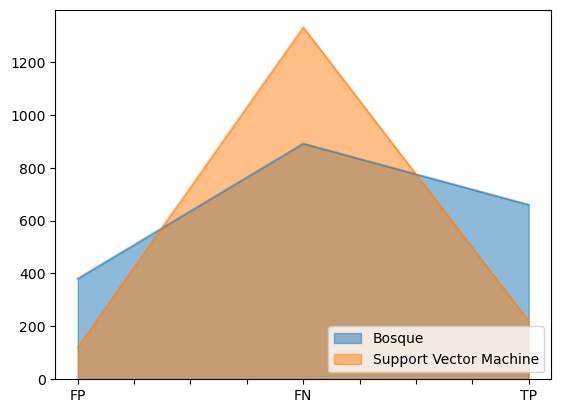

In [47]:
df_matrix.plot.area(stacked = False);

Como se puede ver en "FN" que son los falsos negativos, el modelo SVM esta "desechando" muchas personas que si aceptaron los creditos y esto es practicamente una perdida para el banco. Por lo anterior se podria concluir que el mejor modelo para este caso es el bosque, puesto que es mas importante tener mas gente que acepte la campaña que las que no la aceptarian.

In [48]:
y_pred = rfc.predict(X_test)
X_test["y"] = y_pred
X_aux = X_test.drop(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], axis = 1)
X_test[X_aux.columns] = encoder.inverse_transform(X_aux)

In [49]:
X_test = X_test[X_test["y"] == "yes"]
targets = ["age", "job", "marital", "education", "default", "housing", "loan", "poutcome"]
for target in targets:
    print(target, ": ", X_test[target].value_counts().idxmax())

age :  30.0
job :  management
marital :  married
education :  secondary
default :  no
housing :  no
loan :  no
poutcome :  unknown


Lo que estamos haciendo ahora es ver cual publico puede el Random Forest identificar con mayor frecuencia cuando aceptan el credito. Esto simplemente es una recomendación de lo que podria funcionar mejor en el banco para que en las campañas obtengan más gente interesada.

### 6. Clasificación No Supervisada

Para el método de clasificación no supervisada vamos a trabajar con **DBSCAN**(Density Based Spatial Clustering of Applications). Como bien indica el nombre este modelo se basa en la densidad de los datos, es decir que tan aglomerados están unos de otros.

Sin embargo, cuando hablamos de densidad se tiene que considerar dos factores importantes, en primera medida tenemos que ver cuánto es la cantidad mínima de puntos para que un área sea considerada densa y en segunda instancia se tiene que observar cual es la distancia máxima tolerable entre estos puntos. Estos valores juegan un papel muy importante en el modelo y más adelante podremos observarlo.

Para entrar un poco más en materia, tenemos que explicar cómo clasifica los puntos el modelo que vamos a usar:
 1. Core points: son los puntos que cumple con las condiciones de densidad establecidas.
 2. Achievable points: son los puntos que no cumplen con todas las condiciones de densidad, pero están cerca a los core points
 3. Noise: estos puntos corresponden a los que no cumplen con las condiciones de densidad y ademas no tiene puntos cerca a ellos.

Entonces, con lo anterior en mente el algoritmo de DBSCAN funciona de la siguiente manera:

1. Calcula la matriz de distancia entre los diferentes puntos. Por lo general se usa la distancia Euclidiana.
2. Teniendo en cuenta los valores de distancia máxima entre puntos y cantidad mínima para que sea un área, el algoritmo clasifica los puntos entre las categorías que se explicaron anteriormente.
3. Asigna los core points cercanos a un cluster especifico.

Como se puede ver en algoritmo nunca se especifica la cantidad de clusters que queremos, pero eso no quiere decir que esto lo decida solamente el modelo, dependiendo de los valores de distancia máxima entre puntos y la cantidad de puntos en un área, se podría decir que tenemos cierto control sobre la suma de clusters que se generen.

Ahora haremos un ejemplo de como funciona el modelo.

In [50]:
# Compiamos el dataset original
X = df_bank_org.copy()
# Codificamos los datos categoricos para el modelo
X[df_encoder.columns] = encoder.transform(X[df_encoder.columns])
# Dropeamos la clase, ya que esto va ser sin supervisar
X = X.drop(["y"], axis=1)

In [51]:
# Importamos la libreria que usaremos
from sklearn.cluster import DBSCAN
from collections import Counter
# Creamos la instancia, en este caso estamos asignando una distancia maxima de 100 y una cantidad minima de 1000 puntos
dbscan = DBSCAN(eps = 50, min_samples = 50)
#Entrenamos el modelo
dbscan.fit(X)

DBSCAN(eps=50, min_samples=50)

Despues de haber creado el modelo y entrenado, vamos a ver cuales fueron los clusters que creo.

In [52]:
labels = dbscan.labels_
print(Counter(labels))
X["y"] = labels

Counter({0: 27431, -1: 16897, 6: 307, 5: 246, 1: 104, 3: 100, 4: 92, 2: 34})


Como se puede ver en este caso creo dos clusters, sin embargo, el -1 en este modelo son aquellos puntos que no se pudieron clasificar a alguna área de densidad.

Ahora con ayuda de un gráfico interactivo observaremos como se distribuyeron los puntos.

In [53]:
def plot_3d(x, y, z):
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(111, projection='3d')
    axes = [x, y, z]
    for i in range(-1, len(Counter(labels)) - 1, 1):
        columns = []
        for j in range(len(axes)):
            columns.append(X.apply(lambda x: x[axes[j]] if x["y"] == i else np.nan, axis = 1))
            columns[j] = np.array([columns[j].dropna()])
        ax1.scatter(columns[0], columns[1], columns[2], label = i)
    ax1.set_xlabel(x, color = "r")
    ax1.set_ylabel(y, color = "r")
    ax1.set_zlabel(z, color = "r")
    plt.legend()
    plt.show()

In [54]:
interact(plot_3d, x=df_bank.columns, y=df_bank.columns, z=df_bank.columns);

interactive(children=(Dropdown(description='x', options=('age', 'job', 'marital', 'education', 'default', 'bal…